# Reading netCDF data
- requires [numpy](http://numpy.scipy.org) and netCDF/HDF5 C libraries.
- Github site: https://github.com/Unidata/netcdf4-python
- Online docs: http://unidata.github.io/netcdf4-python/
- Based on Konrad Hinsen's old [Scientific.IO.NetCDF](http://dirac.cnrs-orleans.fr/plone/software/scientificpython/) API, with lots of added netcdf version 4 features.
- Developed by Jeff Whitaker at NOAA, with many contributions from users.

## Interactively exploring a netCDF File

Let's explore a netCDF file from the *Atlantic Real-Time Ocean Forecast System*

first, import netcdf4-python and numpy

In [1]:
!pip install netCDF4
!pip install matplotlib xarray numpy
!pip install Cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.9 MB/s eta 0:00:00


In [51]:
import netCDF4
import numpy as np
import numpy as np
from scipy.optimize import curve_fit
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls /content/drive/Shareddrives/TAMIDS\ Data\ Science\ Competition\ 2024/0_data

 antarctica_mass_200204_202312.txt
 Budget_TimeSeries.mat
 c3s_obs-sl_glo_phy-ssh_my_twosat-l4-duacs-0.25deg_P1D_1709513365903.nc
 CSIRO_ALT_gmsl_mo_2009.csv
 CSIRO_ALT_gmsl_yr_2009.csv
 CSIRO_Recons_gmsl_mo_2009.csv
 CSIRO_Recons_gmsl_yr_2009.csv
'CSVs from .mat files'/
 cu_sea_level_trends_4.nc
 cu_total_sea_level_change_1.nc
 data_copernicus_adt_1993_2023.nc
 download.zip
 gmsl_2023rel2_seasons_rmvd.txt
 GRCTellus.JPL.200204_202312.GLO.RL06.1M.MSCNv03CRI.nc
 Groundwaters_database.csv
 Groundwaters_summary.csv
'Ice Sheet'/
 LRD_Noise_USEastCoast.mat
 Master_D23_Github.m
 Plot_RatesallStations.m
'Sea level'/
 Temperature/


## Create a netCDF4.Dataset object
- **`f`** is a `Dataset` object, representing an open netCDF file.
- printing the object gives you summary information, similar to *`ncdump -h`*.

In [5]:
dataset = '/content/drive/Shareddrives/TAMIDS Data Science Competition 2024/0_data/data_copernicus_adt_1993_2023.nc'

In [6]:
# f = netCDF4.Dataset('data/rtofs_glo_3dz_f006_6hrly_reg3.nc')
f = netCDF4.Dataset(dataset)
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    cdm_data_type: Grid
    comment: Sea Surface Height measured by Altimetry and derived variables
    contact: http://climate.copernicus.eu/c3s-user-service-desk
    creator_email: http://climate.copernicus.eu/c3s-user-service-desk
    creator_name: Copernicus Climate Change Service (C3S)
    creator_url: http://climate.copernicus.eu
    date_created: 2021-07-09T08:53:57Z
    date_issued: 2021-07-09T08:53:57Z
    date_modified: 2021-07-09T08:53:57Z
    geospatial_lat_max: 89.875
    geospatial_lat_min: -89.875
    geospatial_lat_resolution: 0.25
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 179.875
    geospatial_lon_min: -179.875
    geospatial_lon_resolution: 0.25
    geospatial_lon_units: degrees_east
    geospatial_vertical_max: 0.0
    geospatial_vertical_min: 0.0
    geospatial_vertical_positive:

## Access a netCDF variable
- variable objects stored by name in **`variables`** dict.
- print the variable yields summary info (including all the attributes).
- no actual data read yet (just have a reference to the variable object with metadata).

In [7]:
print(f.variables.keys()) # get all variable names
temp = f.variables['adt']  # temperature variable
print(temp)

dict_keys(['adt', 'latitude', 'longitude', 'time'])
<class 'netCDF4._netCDF4.Variable'>
int32 adt(time, latitude, longitude)
    _FillValue: -2147483647
    comment: The absolute dynamic topography is the sea surface height above geoid; the adt is obtained as follows: adt=sla+mdt where mdt is the mean dynamic topography; see the product user manual for details
    grid_mapping: crs
    long_name: Absolute dynamic topography
    standard_name: sea_surface_height_above_geoid
    units: m
    coordinates: longitude latitude
    scale_factor: 0.0001
unlimited dimensions: 
current shape = (11115, 152, 204)
filling on


In [8]:
import xarray as xr

# Load the dataset
ds = xr.open_dataset(dataset)


In [9]:
# import matplotlib.pyplot as plt

# # Load your dataset
# # ds = xr.open_dataset('path_to_your_dataset.nc')

# # Select the ADT slices for the two different time steps
# adt_slice_time_0 = ds['adt'].isel(time=0)
# adt_slice_time_100000 = ds['adt'].isel(time=11115-1)

# # Create a figure with two subplots side by side
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# # Plot ADT for time=0
# pcolormesh0 = axes[0].pcolormesh(adt_slice_time_0.longitude, adt_slice_time_0.latitude, adt_slice_time_0, shading='auto')
# fig.colorbar(pcolormesh0, ax=axes[0], label='Absolute Dynamic Topography (m)')
# axes[0].set_title('ADT at First Time Step')
# axes[0].set_xlabel('Longitude')
# axes[0].set_ylabel('Latitude')

# # Plot ADT for time=100000
# pcolormesh1 = axes[1].pcolormesh(adt_slice_time_100000.longitude, adt_slice_time_100000.latitude, adt_slice_time_100000, shading='auto')
# fig.colorbar(pcolormesh1, ax=axes[1], label='Absolute Dynamic Topography (m)')
# axes[1].set_title('ADT at Time Step 100000')
# axes[1].set_xlabel('Longitude')
# axes[1].set_ylabel('Latitude')

# # Display the plot
# plt.tight_layout()
# plt.show()


In [10]:
# adt_slice = ds['adt'].isel(time=0)  # Selects the first time step

# import matplotlib.pyplot as plt

# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.pcolormesh(adt_slice.longitude, adt_slice.latitude, adt_slice, shading='auto')
# plt.colorbar(label='Absolute Dynamic Topography (m)')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Absolute Dynamic Topography at First Time Step')
# plt.show()


In [11]:
# import matplotlib.pyplot as plt
# import xarray as xr
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# # Load the dataset
# ds = xr.open_dataset(dataset)
# adt_slice = ds['adt'].isel(time=0)  # Select the first time step for simplicity

# # Set up the map
# plt.figure(figsize=(12, 8))
# ax = plt.axes(projection=ccrs.PlateCarree())  # Choose the map projection
# ax.coastlines()  # Add coastlines
# ax.add_feature(cfeature.BORDERS)  # Add country borders for better reference

# # Plot ADT data
# plt.pcolormesh(adt_slice.longitude, adt_slice.latitude, adt_slice,
#                shading='auto', transform=ccrs.PlateCarree())

# plt.colorbar(label='Absolute Dynamic Topography (m)')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Absolute Dynamic Topography on ')

# # Optional: Adjust the extent to focus on a specific area
# # ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# plt.show()


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


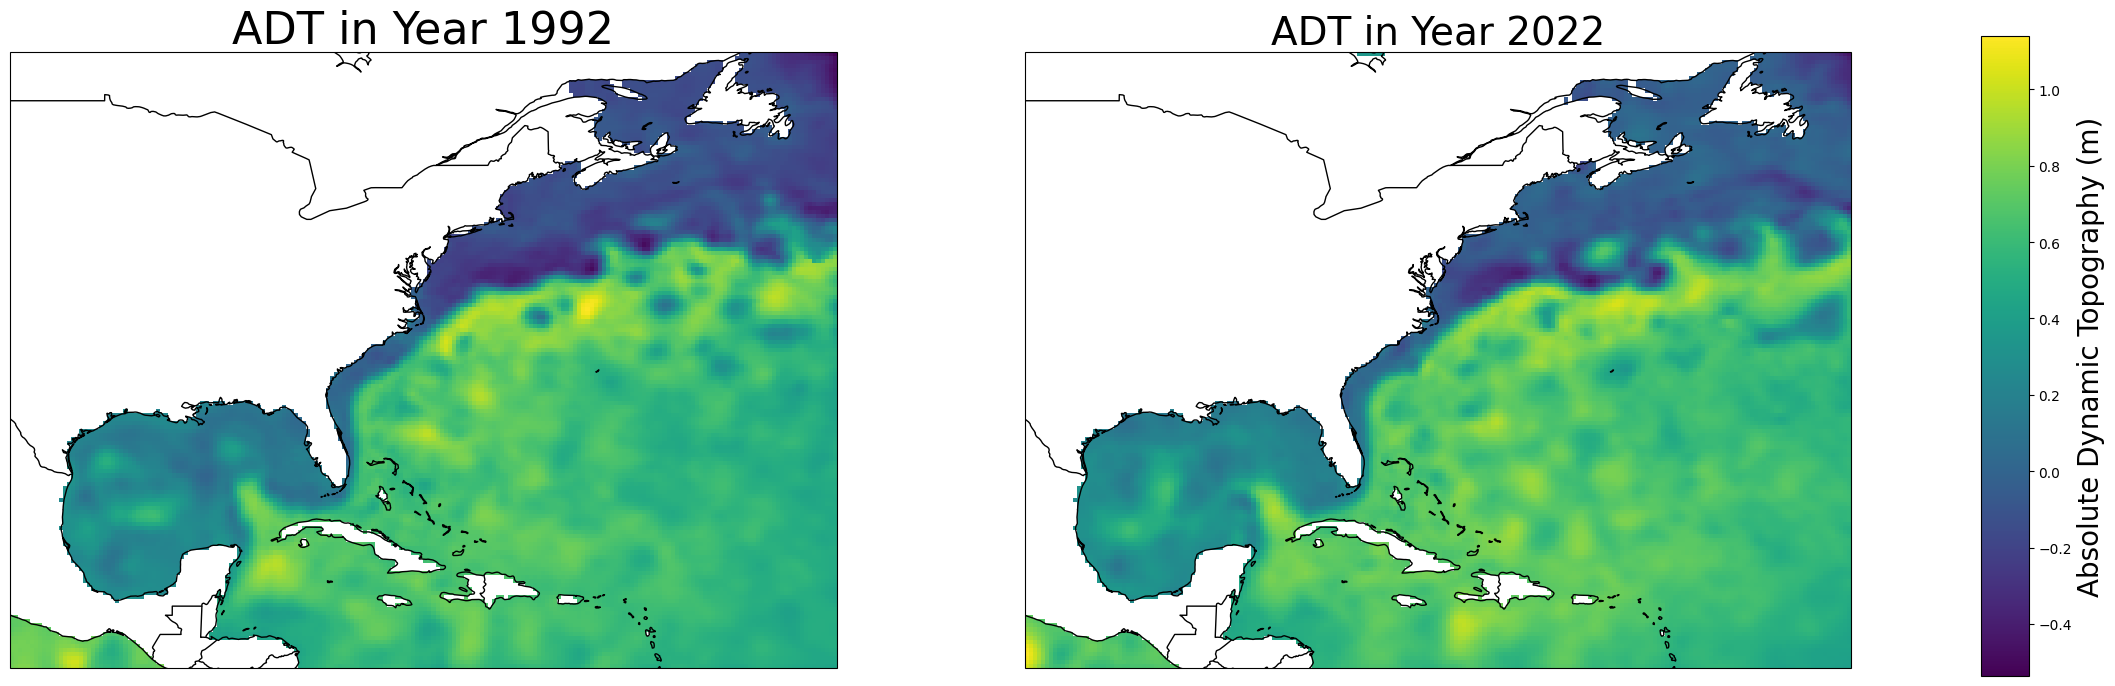

In [12]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
ds = xr.open_dataset(dataset)
adt_slice_time_0 = ds['adt'].isel(time=0)  # Select the first time step
adt_slice_time_100000 = ds['adt'].isel(time=20*365)  # Select the time step 100000

# Determine common color scale range
vmin = min(adt_slice_time_0.min(), adt_slice_time_100000.min())
vmax = max(adt_slice_time_0.max(), adt_slice_time_100000.max())

# Set up the maps
fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(24, 8))

# Plot ADT for time=0
axes[0].coastlines()
axes[0].add_feature(cfeature.BORDERS)
adt_plot_0 = axes[0].pcolormesh(adt_slice_time_0.longitude, adt_slice_time_0.latitude, adt_slice_time_0,
                                 shading='auto', transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
axes[0].set_title('ADT in Year 1992', fontsize=32)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Plot ADT for time=100000
axes[1].coastlines()
axes[1].add_feature(cfeature.BORDERS)
adt_plot_100000 = axes[1].pcolormesh(adt_slice_time_100000.longitude, adt_slice_time_100000.latitude, adt_slice_time_100000,
                                      shading='auto', transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
axes[1].set_title('ADT in Year 2022', fontsize=28)
axes[1].set_xlabel('Longitude', fontsize=20)
axes[1].set_ylabel('Latitude')

# # Create a single colorbar for both subplots
# # cbar = fig.colorbar(adt_plot_100000, ax=axes.ravel().tolist(), orientation='vertical', pad=0.05, aspect=50)
# cbar = fig.colorbar(adt_plot_100000, ax=axes.ravel().tolist(), orientation='vertical')
# cbar.set_label('Absolute Dynamic Topography (m)')

# Create a single colorbar for both subplots, adjust the position here
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])  # Position: [left, bottom, width, height]
cbar = fig.colorbar(adt_plot_100000, cax=cbar_ax, orientation='vertical')
cbar.set_label('Absolute Dynamic Topography (m)', fontsize=20)

# Display the plot
# plt.tight_layout()
# plt.show()
plt.savefig('/content/drive/Shareddrives/TAMIDS Data Science Competition 2024/3_figures_midterm/adt_in_west_coast.png', format='png')


In [13]:
from matplotlib.colors import LinearSegmentedColormap


# Define a simple custom colormap
colors = ['#003a6d', '#750e13']
n_bins = [2]  # Discretizes the interpolation into bins
cmap_name = "myCustomCmap"

# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

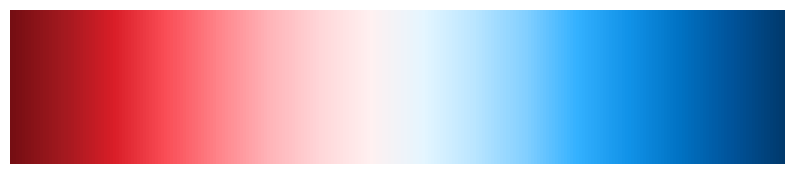

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Replace the placeholder values with the actual hex codes from your image
hex_codes = [
    '#750e13',  # Red 80
    '#a2191f',  # Red 70
    '#da1e28',  # Red 60
    '#fa4d56',  # Red 50
    '#ff8389',  # Red 40
    '#ffb3b8',  # Red 30
    '#ffd7d9',  # Red 20
    '#fff1f1',  # Red 10
    '#e5f6ff',
    '#bae6ff',
    '#82cfff',
    '#33b1ff',
    '#1192e8',
    '#0072c3',
    '#00539a',
    '#003a6d'
]

# Create the custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', hex_codes)

# Use this custom colormap in a plot
# Here, for demonstration, we create a gradient image to visualize the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.repeat(gradient, 10, axis=0)

# Plot the gradient as an image with the custom colormap
fig, ax = plt.subplots(figsize=(10, 2))
ax.imshow(gradient, aspect='auto', cmap=custom_cmap)
ax.set_axis_off()

plt.show()


In [41]:
ds['latitude']

<xarray.DataArray 'latitude' (latitude: 152)>
array([14.125, 14.375, 14.625, 14.875, 15.125, 15.375, 15.625, 15.875, 16.125,
       16.375, 16.625, 16.875, 17.125, 17.375, 17.625, 17.875, 18.125, 18.375,
       18.625, 18.875, 19.125, 19.375, 19.625, 19.875, 20.125, 20.375, 20.625,
       20.875, 21.125, 21.375, 21.625, 21.875, 22.125, 22.375, 22.625, 22.875,
       23.125, 23.375, 23.625, 23.875, 24.125, 24.375, 24.625, 24.875, 25.125,
       25.375, 25.625, 25.875, 26.125, 26.375, 26.625, 26.875, 27.125, 27.375,
       27.625, 27.875, 28.125, 28.375, 28.625, 28.875, 29.125, 29.375, 29.625,
       29.875, 30.125, 30.375, 30.625, 30.875, 31.125, 31.375, 31.625, 31.875,
       32.125, 32.375, 32.625, 32.875, 33.125, 33.375, 33.625, 33.875, 34.125,
       34.375, 34.625, 34.875, 35.125, 35.375, 35.625, 35.875, 36.125, 36.375,
       36.625, 36.875, 37.125, 37.375, 37.625, 37.875, 38.125, 38.375, 38.625,
       38.875, 39.125, 39.375, 39.625, 39.875, 40.125, 40.375, 40.625, 40.875,
       41.125, 41.375, 41.625, 41.875, 42.125, 42.375, 42.625, 42.875, 43.125,
       43.375, 43.625, 43.875, 44.125, 44.375, 44.625, 44.875, 45.125, 45.375,
       45.625, 45.875, 46.125, 46.375, 46.625, 46.875, 47.125, 47.375, 47.625,
       47.875, 48.125, 48.375, 48.625, 48.875, 49.125, 49.375, 49.625, 49.875,
       50.125, 50.375, 50.625, 50.875, 51.125, 51.375, 51.625, 51.875],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 14.12 14.38 14.62 14.88 ... 51.38 51.62 51.88
Attributes:
    axis:           Y
    bounds:         lat_bnds
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_max:      51.875
    valid_min:      14.125

In [44]:
ds['longitude']

<xarray.DataArray 'longitude' (longitude: 204)>
array([-100.875, -100.625, -100.375, ...,  -50.625,  -50.375,  -50.125],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -100.9 -100.6 -100.4 ... -50.62 -50.38 -50.12
Attributes:
    axis:           X
    bounds:         lon_bnds
    long_name:      Longitude
    standard_name:  longitude
    units:          degrees_east
    valid_max:      -50.125
    valid_min:      -100.875

In [65]:
ds['latitude']

<xarray.DataArray 'latitude' (latitude: 152)>
array([14.125, 14.375, 14.625, 14.875, 15.125, 15.375, 15.625, 15.875, 16.125,
       16.375, 16.625, 16.875, 17.125, 17.375, 17.625, 17.875, 18.125, 18.375,
       18.625, 18.875, 19.125, 19.375, 19.625, 19.875, 20.125, 20.375, 20.625,
       20.875, 21.125, 21.375, 21.625, 21.875, 22.125, 22.375, 22.625, 22.875,
       23.125, 23.375, 23.625, 23.875, 24.125, 24.375, 24.625, 24.875, 25.125,
       25.375, 25.625, 25.875, 26.125, 26.375, 26.625, 26.875, 27.125, 27.375,
       27.625, 27.875, 28.125, 28.375, 28.625, 28.875, 29.125, 29.375, 29.625,
       29.875, 30.125, 30.375, 30.625, 30.875, 31.125, 31.375, 31.625, 31.875,
       32.125, 32.375, 32.625, 32.875, 33.125, 33.375, 33.625, 33.875, 34.125,
       34.375, 34.625, 34.875, 35.125, 35.375, 35.625, 35.875, 36.125, 36.375,
       36.625, 36.875, 37.125, 37.375, 37.625, 37.875, 38.125, 38.375, 38.625,
       38.875, 39.125, 39.375, 39.625, 39.875, 40.125, 40.375, 40.625, 40.875,
       41.125, 41.375, 41.625, 41.875, 42.125, 42.375, 42.625, 42.875, 43.125,
       43.375, 43.625, 43.875, 44.125, 44.375, 44.625, 44.875, 45.125, 45.375,
       45.625, 45.875, 46.125, 46.375, 46.625, 46.875, 47.125, 47.375, 47.625,
       47.875, 48.125, 48.375, 48.625, 48.875, 49.125, 49.375, 49.625, 49.875,
       50.125, 50.375, 50.625, 50.875, 51.125, 51.375, 51.625, 51.875],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 14.12 14.38 14.62 14.88 ... 51.38 51.62 51.88
Attributes:
    axis:           Y
    bounds:         lat_bnds
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_max:      51.875
    valid_min:      14.125

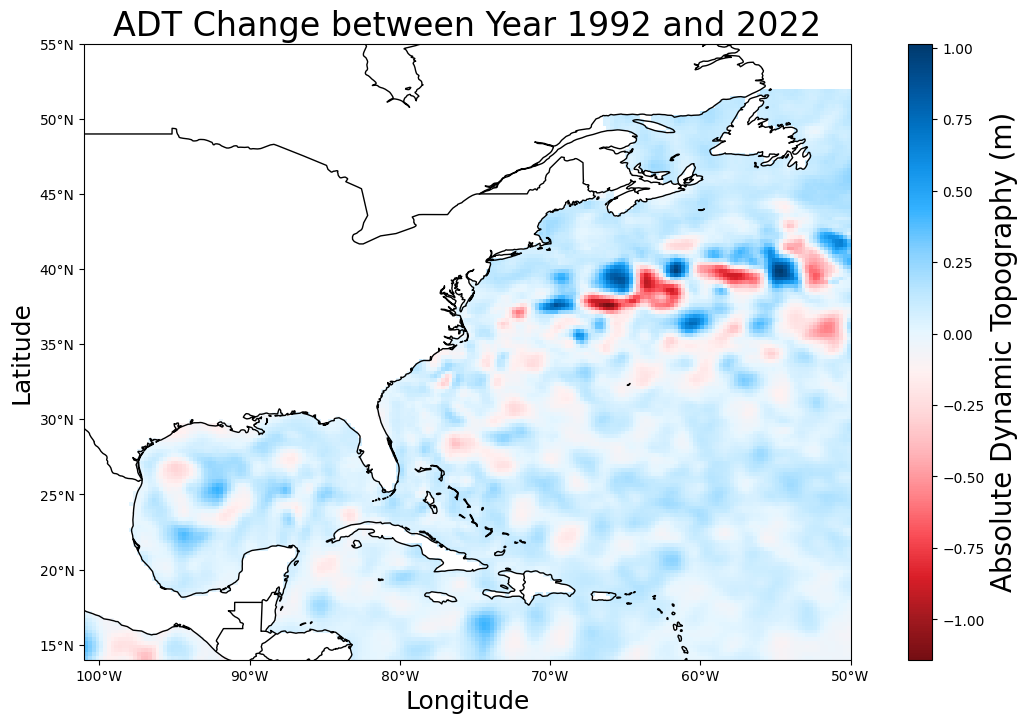

In [74]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
ds = xr.open_dataset(dataset)
adt_slice_time_0 = ds['adt'].isel(time=0)  # Select the first time step
adt_slice_time_100000 = ds['adt'].isel(time=20*365)  # Select the time step 100000

adt_slice_diff = adt_slice_time_100000-adt_slice_time_0

# Determine common color scale range
vmin = min(adt_slice_diff.min(), adt_slice_diff.min())
vmax = max(adt_slice_diff.max(), adt_slice_diff.max())

# print("diff min = ", vmin, ", max = ", vmax)

# Set up the maps
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,8))

# Plot ADT for time=0
axes.coastlines()
axes.add_feature(cfeature.BORDERS)
adt_plot_diff = axes.pcolormesh(adt_slice_diff.longitude, adt_slice_diff.latitude, adt_slice_diff,
                                 shading='auto', transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap=custom_cmap)
axes.set_title('ADT Change between Year 1992 and 2022', fontsize=24)
axes.set_xlabel('Longitude', fontsize=18)
axes.set_ylabel('Latitude', fontsize=18)

axes.set_xticks(np.arange(-100, -49, 10), crs=ccrs.PlateCarree())
axes.set_yticks(np.arange(15, 56, 5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)

# label_ax = fig.add_axes([0.0, 0.0, 1, 1])  # Position: [left, bottom, width, height]
# label_ax.set_ylabel('Latitude', fontsize=24)

# Create a single colorbar for both subplots, adjust the position here
cbar_ax = fig.add_axes([0.88, 0.11, 0.02, 0.77])  # Position: [left, bottom, width, height]
cbar = fig.colorbar(adt_plot_diff, cax=cbar_ax, orientation='vertical')
cbar.set_label('Absolute Dynamic Topography (m)', fontsize=20)

# cbar_ax.set_xlabel('Longitude')

# # Display the plot
# plt.tight_layout()
plt.show()
# plt.savefig('/content/drive/Shareddrives/TAMIDS Data Science Competition 2024/3_figures_midterm/adt_in_west_coast.png', format='png')


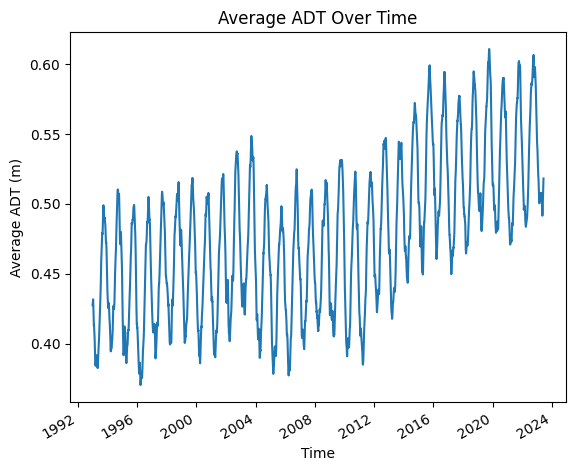

In [16]:
adt_avg = ds['adt'].mean(dim=['latitude', 'longitude'])
# Plotting the averaged ADT time series
adt_avg.plot()
plt.title('Average ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

In [ ]:
time = ds['adt'].time.values
adt = adt_avg

In [ ]:
# t = time.astype('datetime64[Y]').astype(int) + 1970
dates = (time - np.datetime64('1993-01-01')).astype('timedelta64[D]').astype(int)
dates

array([    0,     1,     2, ..., 11112, 11113, 11114])

In [ ]:
adt

<xarray.DataArray 'adt' (time: 11115)>
array([0.42764462, 0.42803857, 0.42826588, ..., 0.51741171, 0.51767367,
       0.51815527])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2023-06-07

In [ ]:
# Define the model function
def adt_model(t, A, f, phi, W0, W1, W2, W3):
    return A * np.sin(2 * np.pi * f * t + phi) + W0 + W1 * t + W2 * t * t + W3 * t * t * t

# Initial guess for the parameters
initial_guess = [max(adt[:400]) - min(adt[:400]), 1/365, 0, np.mean(adt[:365]), 0, 0, 0]

# Fit the model to the data
params, covariance = curve_fit(adt_model, dates, adt, p0=initial_guess)

In [ ]:
params

array([-5.62816215e-02,  2.73960240e-03,  9.98865117e-03,  4.45678250e-01,
       -2.45251563e-06,  1.01098256e-09,  1.18880420e-14])

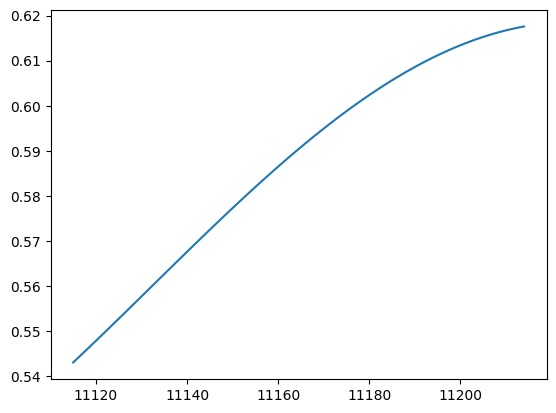

In [ ]:
future_dates = np.arange(11115, 11115+100, 1)
predicted_avg_adt = adt_model(future_dates, *params)

plt.plot(future_dates, predicted_avg_adt)

In [ ]:
adt_avg

<xarray.DataArray 'adt' (time: 11115)>
array([0.42764462, 0.42803857, 0.42826588, ..., 0.51741171, 0.51767367,
       0.51815527])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2023-06-07

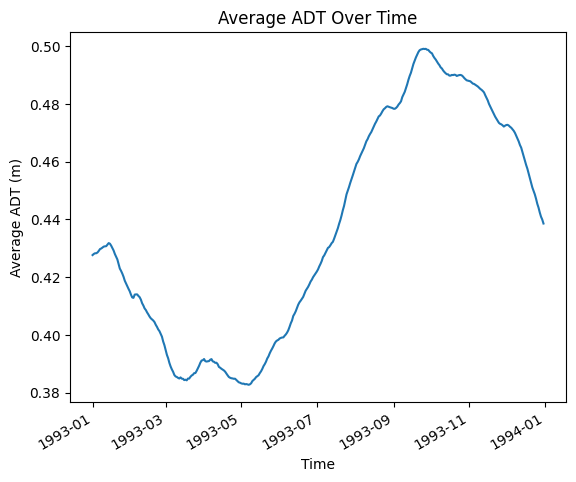

In [ ]:
adt_avg = ds['adt'].mean(dim=['latitude', 'longitude'])
# Plotting the averaged ADT time series
adt_avg[:365].plot()
plt.title('Average ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

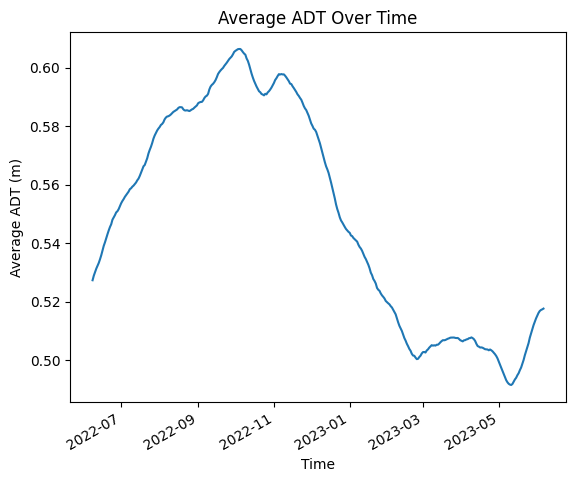

In [ ]:
adt_avg = ds['adt'].mean(dim=['latitude', 'longitude'])
# Plotting the averaged ADT time series
adt_avg[11115-365:11115-1].plot()
plt.title('Average ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

In [ ]:
adt_avg.values.shape

(11115,)

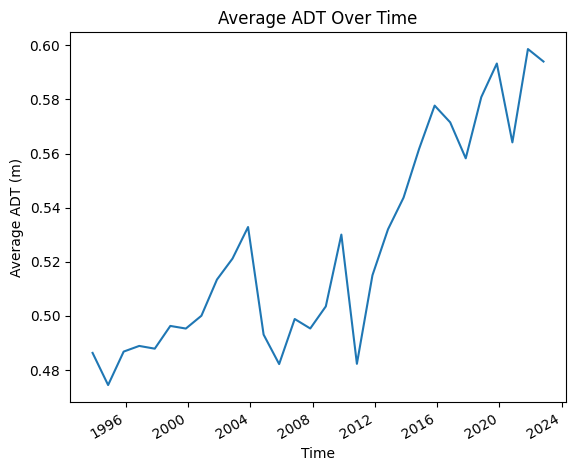

In [ ]:
adt_avg = ds['adt'].mean(dim=['latitude', 'longitude'])
# Plotting the averaged ADT time series
adt_avg[10*31:11115:365].plot()
plt.title('Average ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

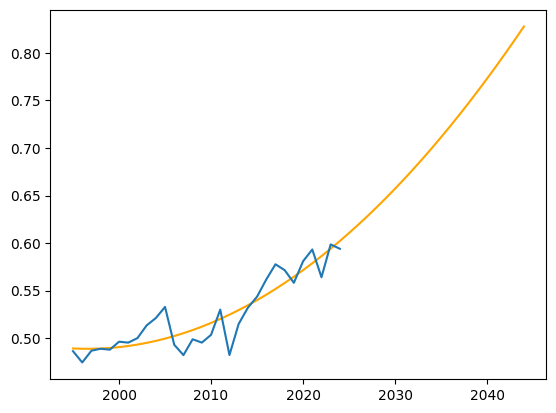

In [ ]:
adt_sep = adt_avg[10*31:11115:365]
year_values = np.arange(1995, 2025, 1)
adt_sep_values = adt_sep.values

degree = 2

adt_sep_values = np.array(adt_sep_values)
# adt_sep_values.shape
# year_values.shape


coefficients = np.polyfit(year_values, adt_sep_values, degree)
coefficients

poly_func = np.poly1d(coefficients)

pred_year_values = np.arange(1995, 2045, 1)
predicted_adt = poly_func(pred_year_values)

plt.plot(pred_year_values, predicted_adt, color = 'orange')
plt.plot(year_values, adt_sep_values)


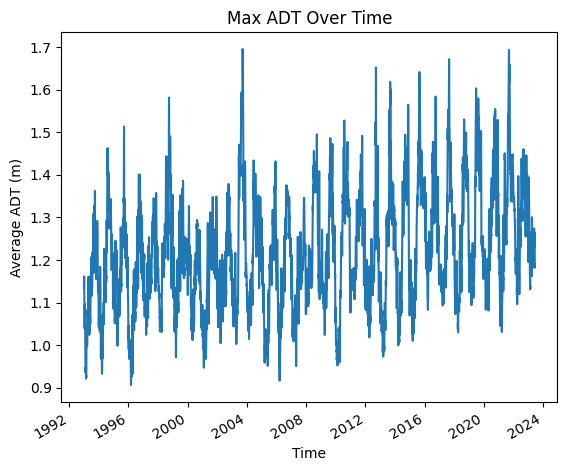

In [ ]:
adt_max = ds['adt'].max(dim=['latitude', 'longitude'])
# Plotting the averaged ADT time series
adt_max.plot()
plt.title('Max ADT Over Time')
plt.xlabel('Time')
plt.ylabel('Average ADT (m)')
plt.show()

In [ ]:
# Group by year and calculate the max ADT for each group
adt_per_year = ds['adt'].groupby('time.year')

# # Print or inspect the result
# # print(adt_max_per_year)

# adt_max_per_year.plot()
# plt.title('Maximum ADT per Year')
# plt.xlabel('Year')
# plt.ylabel('Max ADT (m)')
# plt.grid(True)
# plt.show()

In [ ]:
adt_per_year

DataArrayGroupBy, grouped over 'year'
31 groups with labels 1993, 1994, 1995, ..., 2022, 2023.

In [ ]:
ds

<xarray.Dataset>
Dimensions:    (time: 11115, latitude: 152, longitude: 204)
Coordinates:
  * latitude   (latitude) float32 14.12 14.38 14.62 14.88 ... 51.38 51.62 51.88
  * longitude  (longitude) float32 -100.9 -100.6 -100.4 ... -50.62 -50.38 -50.12
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2023-06-07
Data variables:
    adt        (time, latitude, longitude) float64 0.78 0.8006 ... -0.4317
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...
    copernicusmarine_version:        1.0.3

In [ ]:
# Filter for January 1st of each year
adt_jan_1st = ds['adt'].sel(time=ds['time'].dt.month == 1,
                            time=ds['time'].dt.day == 1)


SyntaxError: keyword argument repeated: time (<ipython-input-30-2b4b74554e87>, line 3)

## List the Dimensions

- All variables in a netCDF file have an associated shape, specified by a list of dimensions.
- Let's list all the dimensions in this netCDF file.
- Note that the **`MT`** dimension is special (*`unlimited`*), which means it can be appended to.

In [ ]:
for d in f.dimensions.items():
    print(d)

Each variable has a **`dimensions`** and a **`shape`** attribute.

In [ ]:
temp.dimensions

In [ ]:
temp.shape

### Each dimension typically has a variable associated with it (called a *coordinate* variable).
- *Coordinate variables* are 1D variables that have the same name as dimensions.
- Coordinate variables and *auxiliary coordinate variables* (named by the *coordinates* attribute) locate values in time and space.

In [ ]:
time = f.variables['time']
latitude = f.variables['latitude']
longitude = f.variables['longitude']
print(time)
print(latitude)
print(longitude)

## Accessing data from a netCDF variable object

- netCDF variables objects behave much like numpy arrays.
- slicing a netCDF variable object returns a numpy array with the data.
- Boolean array and integer sequence indexing behaves differently for netCDF variables than for numpy arrays. Only 1-d boolean arrays and integer sequences are allowed, and these indices work independently along each dimension (similar to the way vector subscripts work in fortran).

In [ ]:
time = time[:]  # Reads the netCDF variable MT, array of one element
print(time)

In [ ]:
latitude = latitude[:] # examine depth array
print(latitude)

In [ ]:
longitude = longitude[:] # examine depth array
print(longitude)

## What is the sea surface temperature and salinity at 50N, 140W?
### Finding the latitude and longitude indices of 50N, 140W

- The `X` and `Y` dimensions don't look like longitudes and latitudes
- Use the auxilary coordinate variables named in the `coordinates` variable attribute, `Latitude` and `Longitude`

In [ ]:
lat, lon = f.variables['latitude'], f.variables['longitude']
print(lat)

Aha!  So we need to find array indices `iy` and `ix` such that `Latitude[iy, ix]` is close to 50.0 and `Longitude[iy, ix]` is close to -140.0 ...

In [ ]:
# extract lat/lon values (in degrees) to numpy arrays
latvals = lat[:]; lonvals = lon[:]
# a function to find the index of the point closest pt
# (in squared distance) to give lat/lon value.
def getclosest_ij(lats,lons,latpt,lonpt):
    # find squared distance of every point on grid
    dist_sq = (lats-latpt)**2 + (lons-lonpt)**2
    # 1D index of minimum dist_sq element
    minindex_flattened = dist_sq.argmin()
    # Get 2D index for latvals and lonvals arrays from 1D index
    return np.unravel_index(minindex_flattened, lats.shape)
iy_min, ix_min = getclosest_ij(latvals, lonvals, 50., -140)

### Now we have all the information we need to find our answer.


```
|----------+--------|
| Variable |  Index |
|----------+--------|
| MT       |      0 |
| Depth    |      0 |
| Y        | iy_min |
| X        | ix_min |
|----------+--------|
```

### What is the sea surface temperature and salinity at the specified point?

In [ ]:
sal = f.variables['salinity']
# Read values out of the netCDF file for temperature and salinity
print('%7.4f %s' % (temp[0,0,iy_min,ix_min], temp.units))
print('%7.4f %s' % (sal[0,0,iy_min,ix_min], sal.units))

## Remote data access via openDAP

- Remote data can be accessed seamlessly with the netcdf4-python API
- Access happens via the DAP protocol and DAP servers, such as TDS.
- many formats supported, like GRIB, are supported "under the hood".

The following example showcases some nice netCDF features:

1. We are seamlessly accessing **remote** data, from a TDS server.
2. We are seamlessly accessing **GRIB2** data, as if it were netCDF data.
3. We are generating **metadata** on-the-fly.

In [ ]:
import datetime
date = datetime.datetime.now()
# build URL for latest synoptic analysis time
URL = 'https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_%04i%02i%02i_%02i%02i.grib2/GC' %\
(date.year,date.month,date.day,6*(date.hour//6),0)
# keep moving back 6 hours until a valid URL found
validURL = False; ncount = 0
while (not validURL and ncount < 10):
    print(URL)
    try:
        gfs = netCDF4.Dataset(URL)
        validURL = True
    except RuntimeError:
        date -= datetime.timedelta(hours=6)
        ncount += 1

In [ ]:
# Look at metadata for a specific variable
# gfs.variables.keys() will show all available variables.
sfctmp = gfs.variables['Temperature_surface']
# get info about sfctmp
print(sfctmp)
# print coord vars associated with this variable
for dname in sfctmp.dimensions:
    print(gfs.variables[dname])

##Missing values
- when `data == var.missing_value` somewhere, a masked array is returned.
- illustrate with soil moisture data (only defined over land)
- white areas on plot are masked values over water.

In [ ]:
soilmvar = gfs.variables['Volumetric_Soil_Moisture_Content_depth_below_surface_layer']
# flip the data in latitude so North Hemisphere is up on the plot
soilm = soilmvar[0,0,::-1,:]
print('shape=%s, type=%s, missing_value=%s' % \
      (soilm.shape, type(soilm), soilmvar.missing_value))
import matplotlib.pyplot as plt
%matplotlib inline
cs = plt.contourf(soilm)

##Packed integer data
There is a similar feature for variables with `scale_factor` and `add_offset` attributes.

- short integer data will automatically be returned as float data, with the scale and offset applied.  

## Dealing with dates and times
- time variables usually measure relative to a fixed date using a certain calendar, with units specified like ***`hours since YY:MM:DD hh-mm-ss`***.
- **`num2date`** and **`date2num`** convenience functions provided to convert between these numeric time coordinates and handy python datetime instances.  
- **`date2index`** finds the time index corresponding to a datetime instance.

In [ ]:
from netCDF4 import num2date, date2num, date2index
timedim = sfctmp.dimensions[0] # time dim name
print('name of time dimension = %s' % timedim)
times = gfs.variables[timedim] # time coord var
print('units = %s, values = %s' % (times.units, times[:]))

In [ ]:
dates = num2date(times[:], times.units)
print([date.strftime('%Y-%m-%d %H:%M:%S') for date in dates[:10]]) # print only first ten...

###Get index associated with a specified date, extract forecast data for that date.

In [ ]:
from datetime import datetime, timedelta
date = datetime.now() + timedelta(days=3)
print(date)
ntime = date2index(date,times,select='nearest')
print('index = %s, date = %s' % (ntime, dates[ntime]))

###Get temp forecast for Boulder (near 40N, -105W)
- use function **`getcloses_ij`** we created before...

In [ ]:
lats, lons = gfs.variables['lat'][:], gfs.variables['lon'][:]
# lats, lons are 1-d. Make them 2-d using numpy.meshgrid.
lons, lats = np.meshgrid(lons,lats)
j, i = getclosest_ij(lats,lons,40,-105)
fcst_temp = sfctmp[ntime,j,i]
print('Boulder forecast valid at %s UTC = %5.1f %s' % \
      (dates[ntime],fcst_temp,sfctmp.units))

##Simple multi-file aggregation

What if you have a bunch of netcdf files, each with data for a different year, and you want to access all the data as if it were in one file?

In [ ]:
!ls -ldgG data/prmsl*nc

**`MFDataset`** uses file globbing to patch together all the files into one big Dataset.
You can also pass it a list of specific files.

Limitations:

- It can only  aggregate the data along the leftmost dimension of each variable.
- only works with `NETCDF3`, or `NETCDF4_CLASSIC` formatted files.
- kind of slow.

In [ ]:
mf = netCDF4.MFDataset('data/prmsl*nc')
times = mf.variables['time']
dates = num2date(times[:],times.units)
print('starting date = %s' % dates[0])
print('ending date = %s'% dates[-1])
prmsl = mf.variables['prmsl']
print('times shape = %s' % times.shape)
print('prmsl dimensions = %s, prmsl shape = %s' %\
     (prmsl.dimensions, prmsl.shape))

## Closing your netCDF file

It's good to close netCDF files, but not actually necessary when Dataset is open for read access only.


In [ ]:
f.close()
gfs.close()

##That's it!

Now you're ready to start exploring your data interactively.

To be continued with **Writing netCDF data** ....